In [92]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
def cpudataparse(dataStr):
#     print(dataStr)
    cpu_id = dataStr.split(":")[0].strip()
    if len(dataStr.split(",")) >=4:
        idle_info = dataStr.split(",")[3].strip("id").strip()
    else:
        idle_info = 100.0
    return cpu_id, 100.0-float(idle_info)

In [94]:
#Data to store information


In [95]:
#Reading the trace file
def AnalyzeData(filename):
    cpu_usage = {}
    mem_usage = []
#     filename = "trace_data/TraceYubi"
    count = 0
    with open(filename) as file:
        for line in file:
    #         print(count, line)
            if (count+1)% 16 == 13:
    #             print("Mem", line)
                memline = line.split(",")
                if len(memline) >= 3:
                    memused = memline[2].strip("used").strip()
    #             print(memused)
                    mem_usage.append(float(memused))
            if (count+1)%16 < 13 and (count+1)%16 > 2:
                line = line.split("%Cpu")
    #             print("Test1. ", line[1])
    #             print("Test2. ", line[2])
                cid, usage   = cpudataparse(line[1])
                cid1, usage1 = cpudataparse(line[2])

                if cid not in cpu_usage:
                    cpu_usage[cid] = []

                if cid1 not in cpu_usage:
                    cpu_usage[cid1] = []

                cpu_usage[cid].append(usage)
                cpu_usage[cid1].append(usage1)


            count += 1
    return cpu_usage, mem_usage
#         if count==60:
#             break

In [96]:
## Yubi
cpu_yubi, mem_yubi = AnalyzeData("trace_data/TraceYubi")

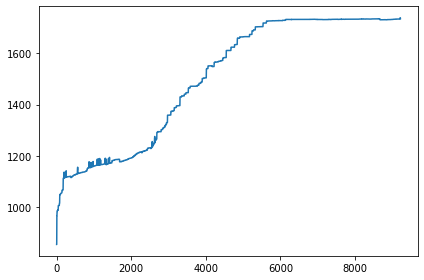

In [97]:
plt.plot(mem_yubi)
plt.tight_layout()
plt.show()

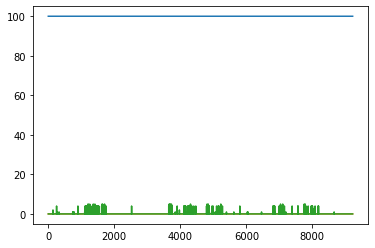

In [115]:
plt.plot(cpu_yubi['0'])
plt.plot(cpu_yubi['1'])
plt.plot(cpu_yubi['2'])
plt.show()

In [103]:
# Dennis
cpu_dennis, mem_dennis = AnalyzeData("trace_data/TraceDennis")

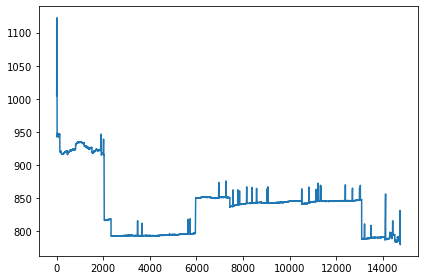

In [104]:
plt.plot(mem_dennis)
plt.tight_layout()
plt.show()

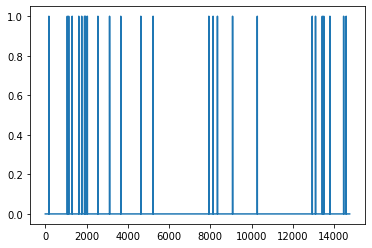

In [113]:
plt.plot(cpu_dennis['19'])
plt.show()